In [3]:
#In this cell all libraries used in the notebook are loaded
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import timeit

from ema_workbench import (Model, CategoricalParameter, SequentialEvaluator, MultiprocessingEvaluator, Policy, Scenario, perform_experiments,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results, load_results)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
import ema_workbench.analysis.prim as prim
import copy

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [6]:
#This loads the data generated by PG.4
experiments, outcomes = load_results('final_policy.tar.gz')
experiments_SD = pd.DataFrame(experiments)

[MainProcess/INFO] results loaded succesfully from C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\final_policy.tar.gz


In [98]:
#Here a dataframe is created including the relevant experiments, called x, and a numpy array called y that returns true if 0.01 deaths is exceeded
x = experiments_SD.filter(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate',
                       'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail',
                      'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'])
y = []
for i in range(10000):
    if outcomes['A.1_Expected Number of Deaths'][i]> 0.01 or outcomes['A.2_Expected Number of Deaths'][i]> 0.01 or outcomes['A.3_Expected Number of Deaths'][i]> 0.01 or outcomes['A.4_Expected Number of Deaths'][i]> 0.01 or outcomes['A.5_Expected Number of Deaths'][i]> 0.01:
        y.append(True)
    else:
        y.append(False)
y = np.array(y)
y

array([False, False, False, ..., False, False, False])

[MainProcess/INFO] 10000 points remaining, containing 11 cases of interest
[MainProcess/INFO] mean: 0.016611295681063124, mass: 0.0602, coverage: 0.9090909090909091, density: 0.016611295681063124 restricted_dimensions: 9


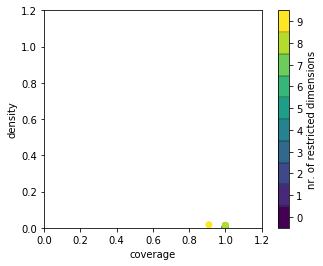

In [100]:
#Prim is used to fit a box around the data. Due to the low number of cases and their spread, the density stayed low
prim_alg = prim.Prim(x, y, threshold=0.01, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage             1
density     0.00318841
id                  10
mass             0.345
mean        0.00318841
res_dim              4
Name: 10, dtype: object

                             box 10              \
                                min         max   
A.1_pfail                  0.000065    0.808979   
A.3_Bmax                 115.797219  349.989242   
A.0_ID flood wave shape   25.500000  121.500000   
A.1_Bmax                  89.513695  349.984828   

                                                                    
                                                         qp values  
A.1_pfail                              [-1.0, 0.28768792763154366]  
A.3_Bmax                               [0.18529130634395974, -1.0]  
A.0_ID flood wave shape  [0.25055097835274737, 0.3826071891136843]  
A.1_Bmax                               [0.28594929992086904, -1.0]  



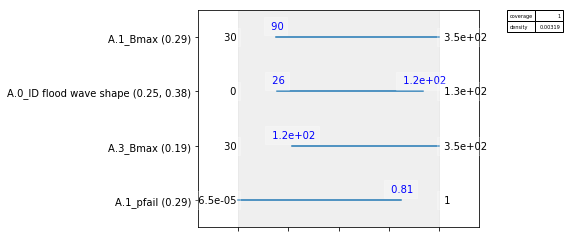

In [106]:
#Several boxes have been inspected. No useful conclusions could be drawn
box1.inspect(10)
box1.inspect(10, style='graph')
plt.show()

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


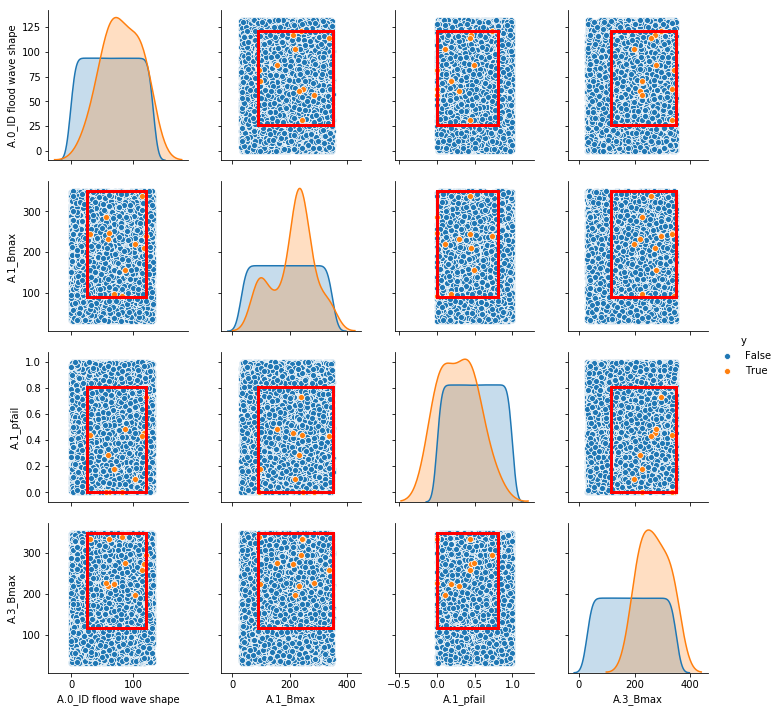

In [107]:
box1.select(10)
fig = box1.show_pairs_scatter()
plt.show()

In [109]:
#Another analysis for the expected damage was carried out. With even less cases of interest, the results were not very useful
y2 = []
for i in range(10000):
    if outcomes['Expected Annual Damage'][i]> 1e8:
        y2.append(True)
    else:
        y2.append(False)
y2 = np.array(y2)
y2

array([False, False, False, ..., False, False, False])

[MainProcess/INFO] 10000 points remaining, containing 7 cases of interest
[MainProcess/INFO] mean: 0.01383399209486166, mass: 0.0506, coverage: 1.0, density: 0.01383399209486166 restricted_dimensions: 7


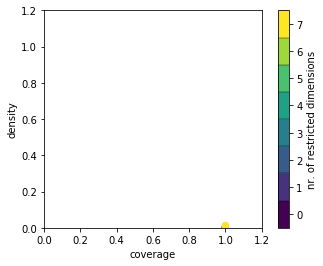

In [112]:
prim_alg = prim.Prim(x, y2, threshold=0.01, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage             1
density     0.00591716
id                  20
mass            0.1183
mean        0.00591716
res_dim              5
Name: 20, dtype: object

                             box 20              \
                                min         max   
A.1_pfail                  0.000065    0.806796   
A.0_ID flood wave shape   52.500000  121.500000   
A.3_Bmax                 155.506680  349.989242   
A.2_Bmax                 115.097573  349.986710   
A.1_Bmax                  79.742101  289.876270   

                                                                    
                                                         qp values  
A.1_pfail                               [-1.0, 0.3336713238904334]  
A.0_ID flood wave shape  [0.10188318581494454, 0.3752780216779592]  
A.3_Bmax                               [0.12385558150125336, -1.0]  
A.2_Bmax                               [0.23848067397302253, -1.0]  
A.1_Bmax                  [0.3410352575009327, 0.2962099191099033

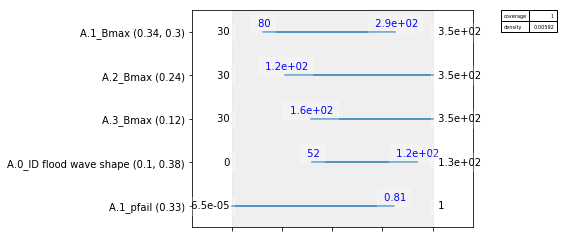

In [114]:
box1.inspect(20)
box1.inspect(20, style='graph')
plt.show()